In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Cargar datos
Sales_Final = pd.read_csv('/content/SalesFINAL.csv')

In [ ]:
Sales_Final.shape

(859011, 14)

In [ ]:
Sales_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859011 entries, 0 to 859010
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     859011 non-null  object 
 1   Store           859011 non-null  int64  
 2   Brand           859011 non-null  int64  
 3   Description     859011 non-null  object 
 4   Size            859011 non-null  object 
 5   SalesQuantity   859011 non-null  int64  
 6   SalesDollars    859011 non-null  float64
 7   SalesPrice      859011 non-null  float64
 8   SalesDate       859011 non-null  object 
 9   Volume          859011 non-null  int64  
 10  Classification  859011 non-null  int64  
 11  ExciseTax       859011 non-null  float64
 12  VendorNo        859011 non-null  int64  
 13  VendorName      859011 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 91.8+ MB


In [ ]:
# Formato Fecha
Sales_Final['SalesDate'] = pd.to_datetime(Sales_Final['SalesDate'])
Sales_Final.set_index('SalesDate', inplace=True)


In [ ]:
Sales_Final.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo,VendorName
SalesDate,,,,,,,,,,,,,
2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
2016-01-02,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2016-01-03,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
2016-01-08,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
2016-01-09,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
Sales_Final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 859011 entries, 2016-01-01 to 2016-01-15
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     859011 non-null  object 
 1   Store           859011 non-null  int64  
 2   Brand           859011 non-null  int64  
 3   Description     859011 non-null  object 
 4   Size            859011 non-null  object 
 5   SalesQuantity   859011 non-null  int64  
 6   SalesDollars    859011 non-null  float64
 7   SalesPrice      859011 non-null  float64
 8   Volume          859011 non-null  int64  
 9   Classification  859011 non-null  int64  
 10  ExciseTax       859011 non-null  float64
 11  VendorNo        859011 non-null  int64  
 12  VendorName      859011 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 91.8+ MB


In [ ]:
#Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset.
# Calcula medidas de tendencia central, la media, mediana, desviación estándar, mínimo y máximo
#de cada columna

for i in Sales_Final.columns:
    print(i)
    print(Sales_Final[i].describe())
    print('---------------------------------')

InventoryId
count               859011
unique              153989
top       51_ABERDEEN_1233
freq                    31
Name: InventoryId, dtype: object
---------------------------------
Store
count    859011.000000
mean         42.231439
std          22.270563
min           1.000000
25%          23.000000
50%          43.000000
75%          63.000000
max          76.000000
Name: Store, dtype: float64
---------------------------------
Brand
count    859011.000000
mean      12242.388444
std       12398.461665
min          58.000000
25%        3687.000000
50%        6448.000000
75%       18013.000000
max       90089.000000
Name: Brand, dtype: float64
---------------------------------
Description
count                859011
unique                 6724
top       Smirnoff 80 Proof
freq                   5895
Name: Description, dtype: object
---------------------------------
Size
count     859011
unique        40
top        750mL
freq      489062
Name: Size, dtype: object
-------------------

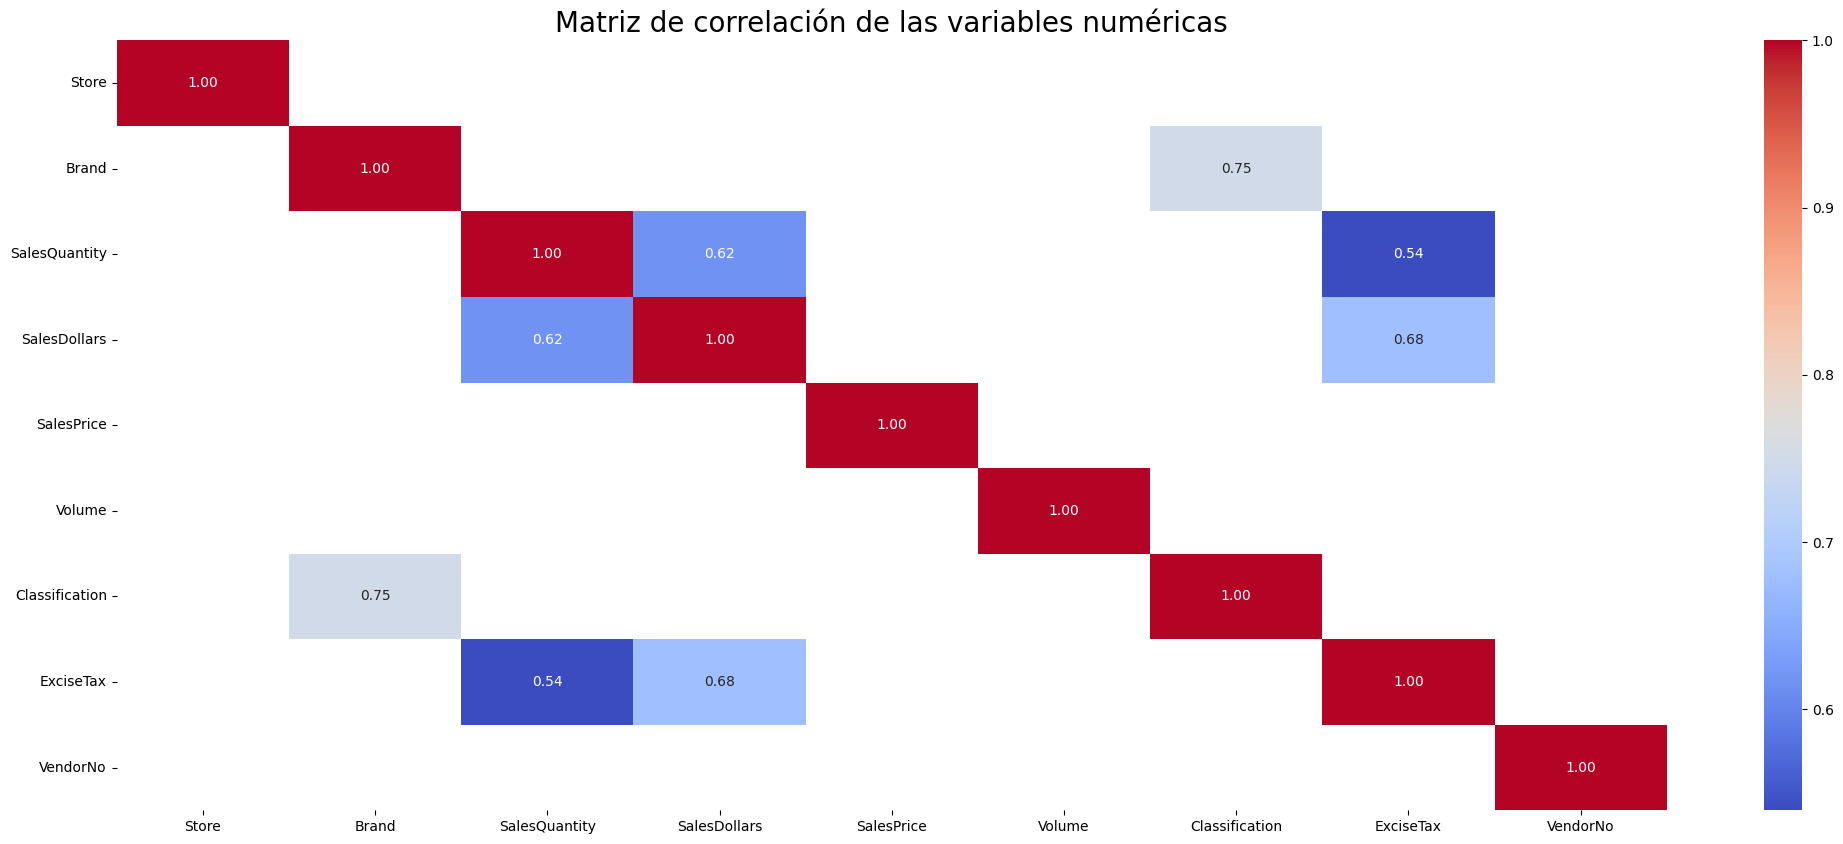

In [ ]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = Sales_Final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Sales_Final[numeric_columns].corr()

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

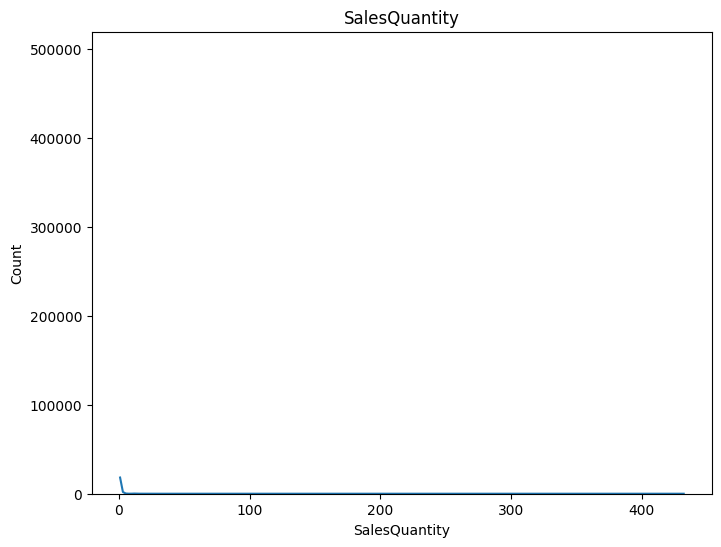

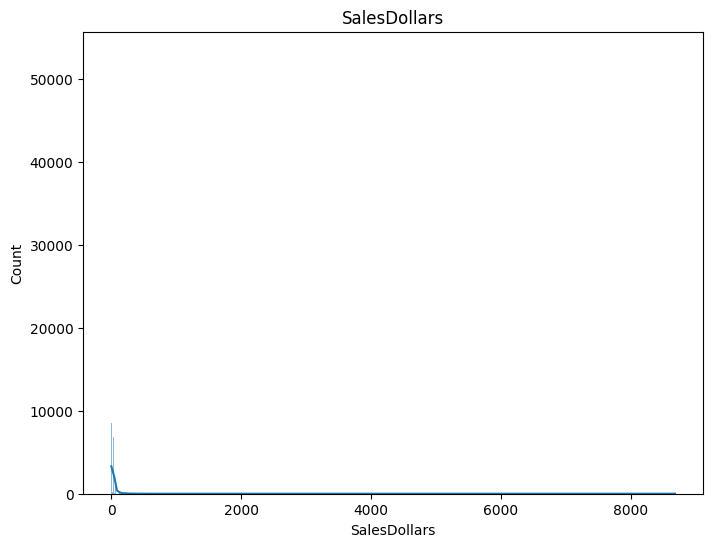

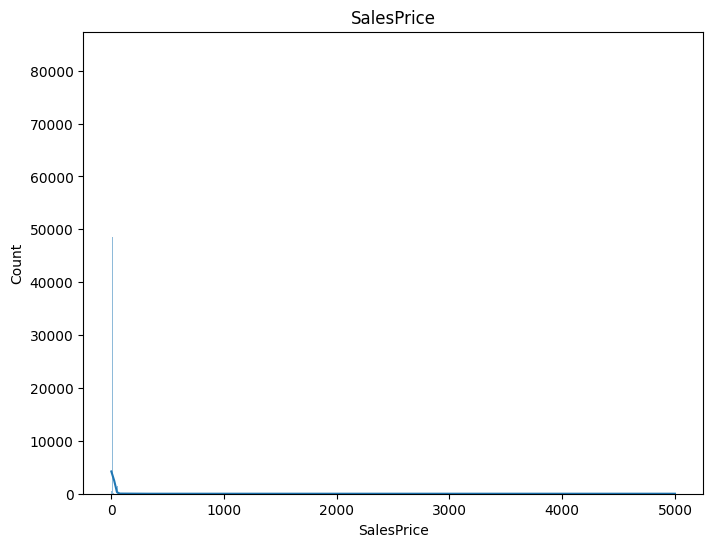

In [ ]:
# mismo análisis anterior pero con Histrogramas para ver la distribución de los datos
# hago lista con las columnas que interesan
lista_columnas=["SalesQuantity", "SalesDollars", "SalesPrice"]

# Crear histogramas de las variables numéricas
for i in Sales_Final[lista_columnas]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(Sales_Final[i], kde=True)
    plt.title(i)
    plt.show()

In [67]:
# prompt: series temporales

# Resampleo de datos a nivel mensual (o la frecuencia que necesites)
Sales_Final_monthly = Sales_Final.resample('M').sum()


# Descomposición de la serie temporal (Aditiva o Multiplicativa)
decomposition = seasonal_decompose(Sales_Final_monthly['SalesQuantity'], model='additive') #Cambiar a 'multiplicative' si es necesario

# Gráficas de las componentes
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()


# # Grafica de predicción
# plt.plot(Sales_Final_monthly['SalesQuantity'])
# plt.plot(predictions)
# plt.show()



<ipython-input-67-5e008528031d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Sales_Final_monthly = Sales_Final.resample('M').sum()


KeyboardInterrupt: 